# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Loading data from csv file to Pandas DataFrame
customer_data = pd.read_csv("Mall_Customers.csv")

In [49]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Preprocessing

In [50]:
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [51]:
customer_data.shape

(200, 5)

In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [54]:
customer_data.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [55]:
# check for null values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
customer_data.drop(["CustomerID"],axis=1,inplace=True)


In [57]:
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Univariate analysis

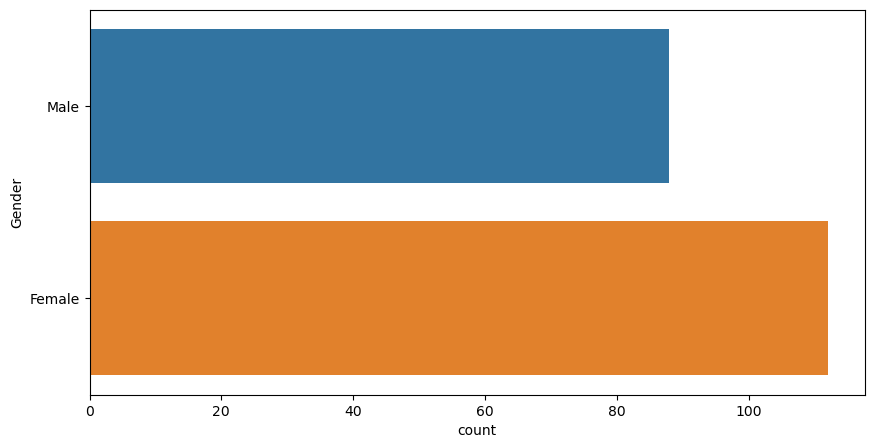

In [58]:

plt.figure(figsize=(10,5))
sns.countplot(y='Gender',data=customer_data)
plt.show()

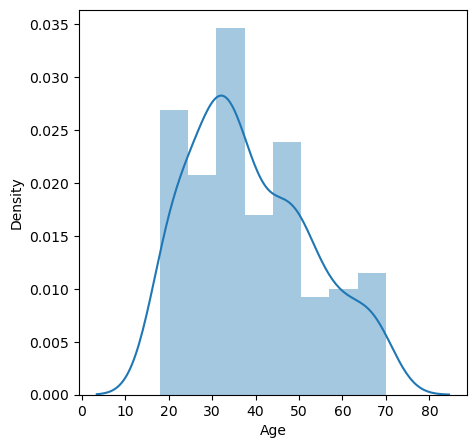

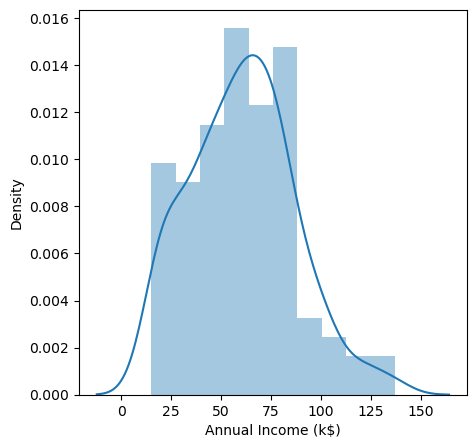

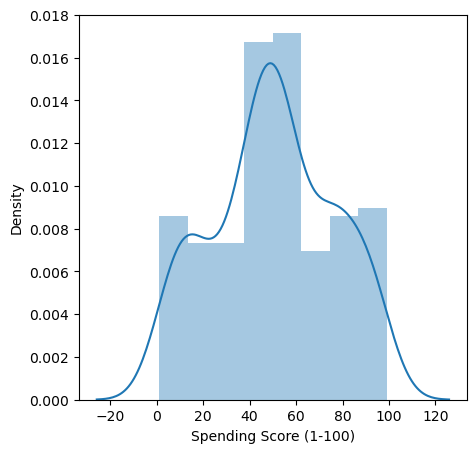

In [59]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(5,5))
    sns.distplot(customer_data[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

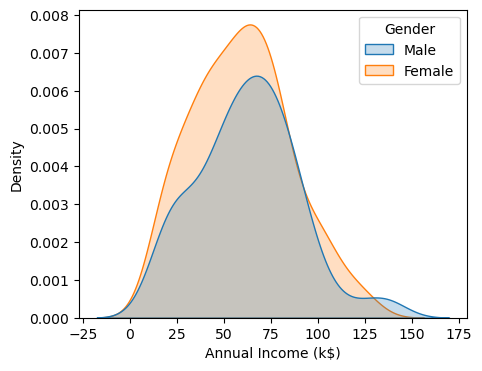

In [60]:
plt.figure(figsize=(5,4))
sns.kdeplot(customer_data['Annual Income (k$)'],shade = True, hue =customer_data['Gender'])


In [61]:
customer_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

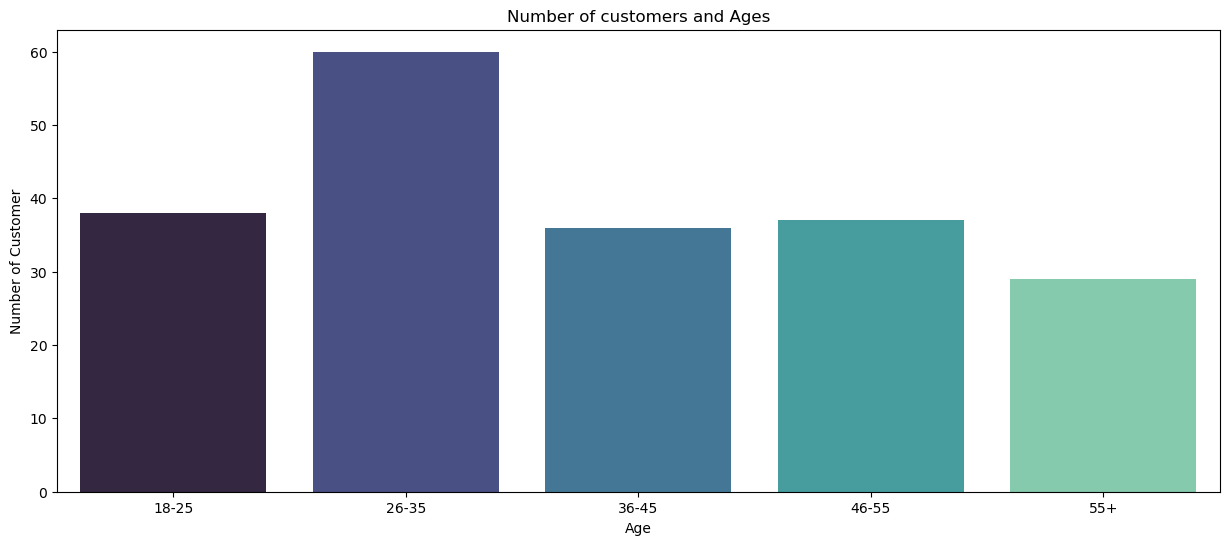

In [62]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_55above = customer_data.Age[customer_data.Age >= 56]

age_x = ["18-25","26-35","36-45","46-55","55+"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x,y=age_y,palette="mako")
plt.title("Number of customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

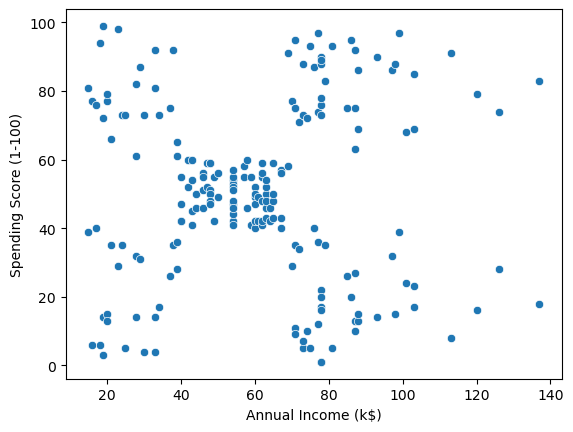

In [63]:
sns.scatterplot(data=customer_data,x='Annual Income (k$)',y='Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

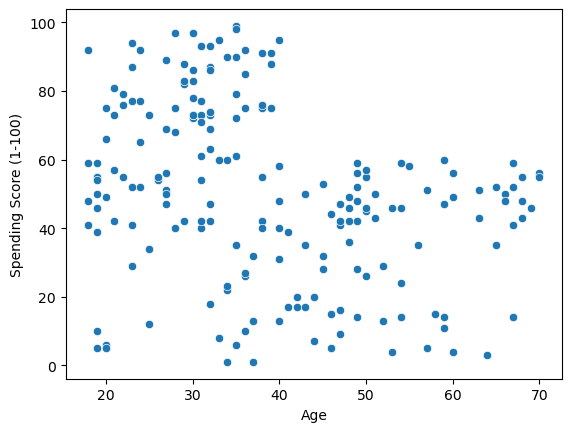

In [64]:
sns.scatterplot(data=customer_data,x='Age',y='Spending Score (1-100)')

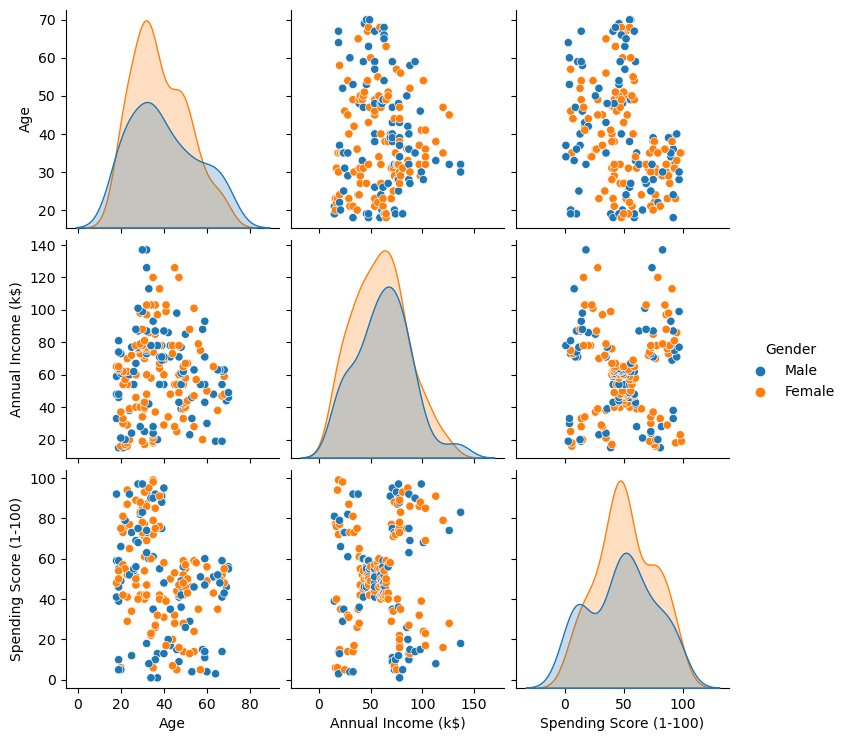

In [65]:
sns.pairplot(customer_data,hue='Gender')

In [66]:
customer_data.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [67]:
customer_data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

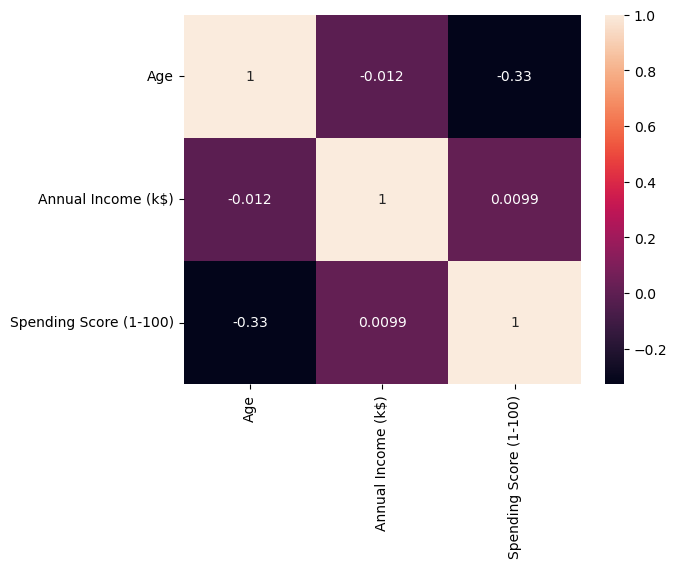

In [68]:
sns.heatmap(customer_data.corr(),annot=True)

In [69]:
D = customer_data.iloc[:,[2,3]].values
print(D)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [70]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Within clusters sum of squares

In [85]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(D)
    
    wcss.append(kmeans.inertia_)



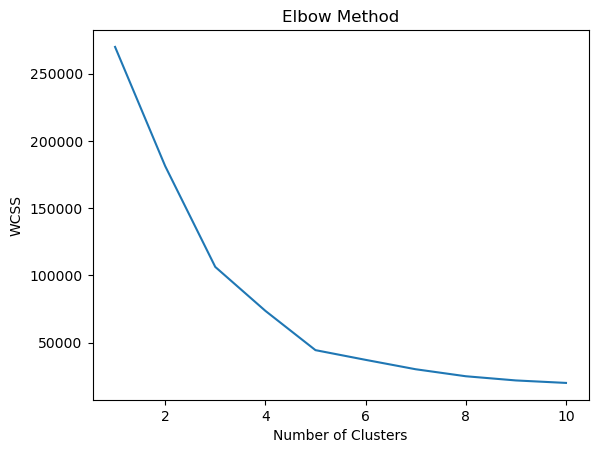

In [86]:
# Plot the WCSS values to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [73]:

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(D)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


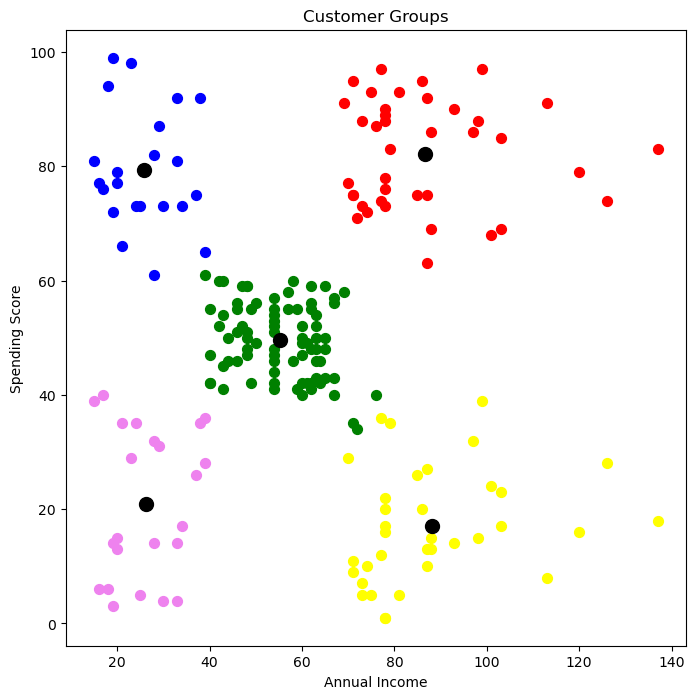

In [74]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(D[Y==0,0], D[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(D[Y==1,0], D[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(D[Y==2,0], D[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(D[Y==3,0], D[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(D[Y==4,0], D[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [75]:
df = customer_data.drop(["Gender","Annual Income (k$)"],axis=1,inplace=True)

In [76]:
customer_data

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [77]:
X = customer_data.iloc[:,:].values
print(X)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [87]:
wcss_ = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)


In [95]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Z = kmeans.fit_predict(X)

print(Z)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


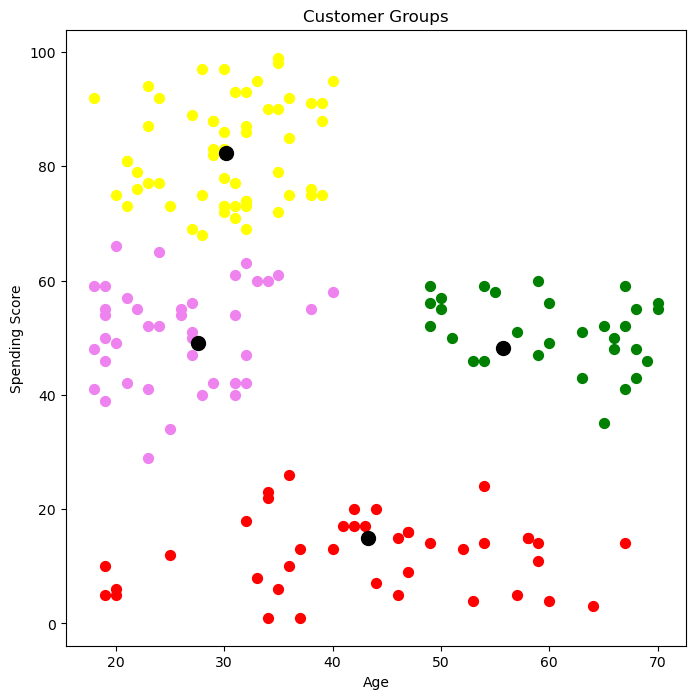

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()